## Genetic Linear Regression
A solution with evolution.

In [42]:
# Importing Libraries
library(ggplot2)
library(dplyr)

[1] 2.656455 1.148428


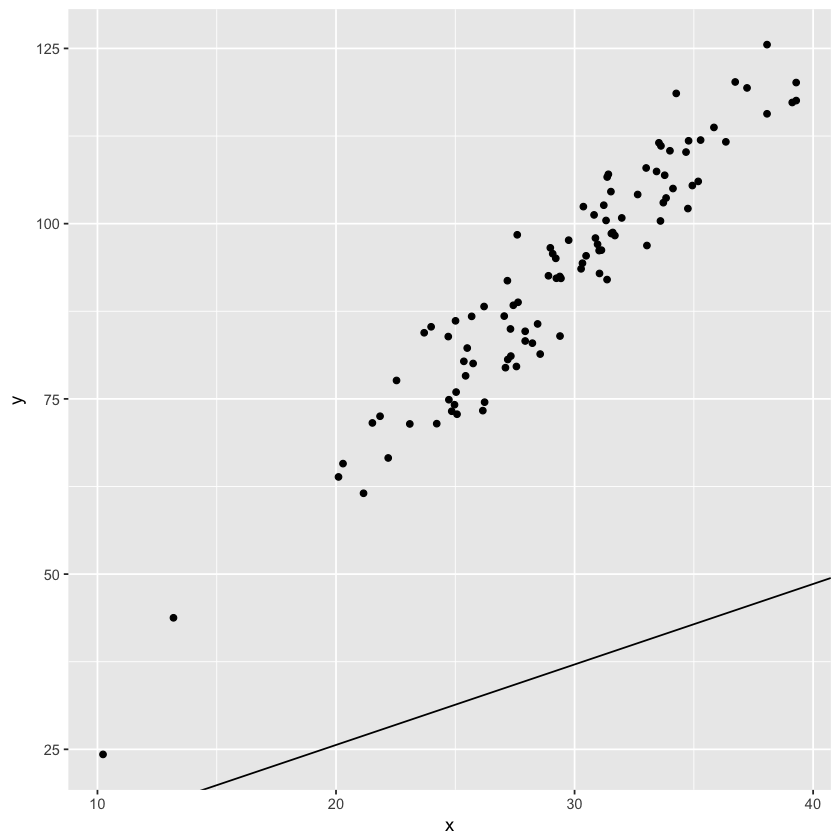

In [43]:
# Generating Data
x <- rnorm(100, 30, 5)
y <- 3*x + 5 + rnorm(x, 0, 5)

# Randomly generate a set of model coefficients
beta <- runif(2, -5, 5)

# Visualize how our data looks
data.frame(x, y) %>%
    ggplot(aes(x,y)) + 
    geom_point() +
    geom_abline(intercept=beta[1], slope = beta[2])

print(beta)

In [44]:
# Model prediction
yhat <- beta[1] + beta[2]*x

# Score
rmse <- sqrt(mean((y-yhat)^2))

print(rmse)

[1] 57.10761


In [45]:
# Now with simple GA

# Generate population
total_pop <- 1000
population <- data.frame(beta0 = runif(total_pop, -100, 100), beta1 = runif(total_pop, -100, 100)) 

# Score population
population$rmse <- 0

for(generation in 1:50){
  for(i in 1:nrow(population)){
    population$rmse[i] <- sqrt(mean((y-(population$beta0[i] + population$beta1[i]*x))^2))
  }
  
  # Selection
  top_pop <- head(population[order(population$rmse),], total_pop/10)
  
  # Crossover
  population$beta0 <- sample(top_pop$beta0, total_pop, replace = TRUE)
  population$beta1 <- sample(top_pop$beta1, total_pop, replace = TRUE)
  
  # Mutation
  population$beta0 <- population$beta0 + rnorm(total_pop)
  population$beta1 <- population$beta1 + rnorm(total_pop)
}

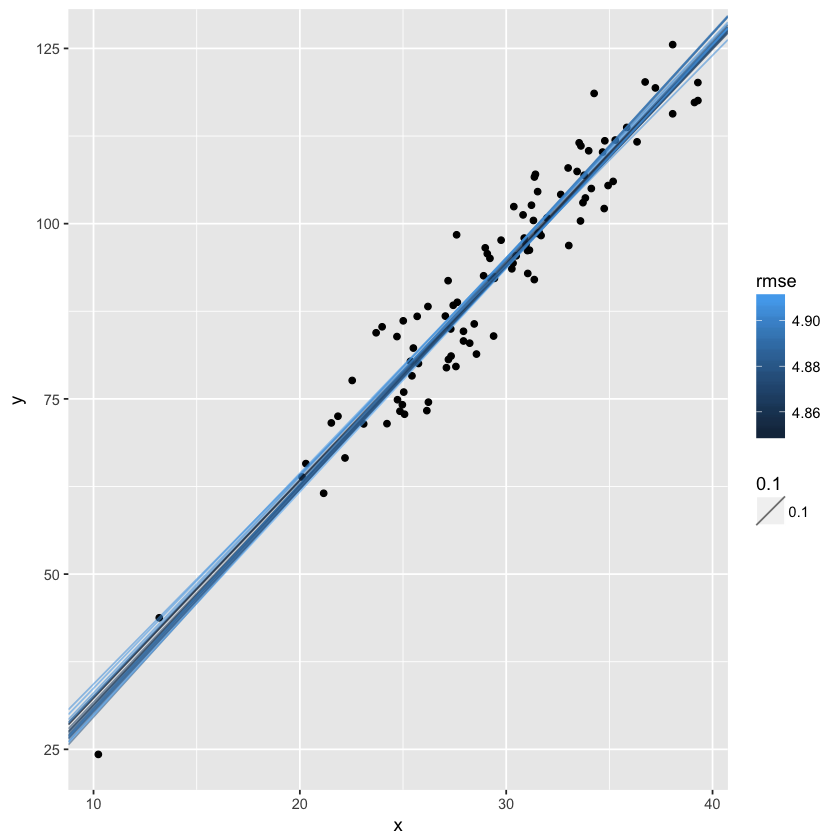

In [46]:
# Visualizing
data.frame(x, y) %>%
  ggplot(aes(x,y)) + 
  geom_point() +
  geom_abline(data = head(top_pop, 20), aes(intercept=beta0, slope = beta1, alpha = 0.1, color = rmse))

In [47]:
head(top_pop)

,beta0,beta1,rmse
61,-0.1308152,3.143741,4.846615
692,-0.8369888,3.169901,4.846930
623,1.3022423,3.099413,4.847344
726,1.2469032,3.110888,4.849500
920,1.8306345,3.076649,4.857646
490,0.1184886,3.126308,4.864864


In [48]:
paste("Estimate for beta0 is:  " , mean(top_pop$beta0))
paste("Estimate for beta1 is:  " , mean(top_pop$beta1))
paste("Estimate for beta0 SE is:  ", sd(top_pop$beta0))
paste("Estimate for beta1 SE is:  ", sd(top_pop$beta1))

[1] "Estimate for beta0 is:   -0.346074123039512"

[1] "Estimate for beta1 is:   3.14205592691787"

[1] "Estimate for beta0 SE is:   3.3259507105428"

[1] "Estimate for beta1 SE is:   0.118668032039887"

In [49]:
# Benchmark against lm
fit <- lm(y ~ x)
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9786 -4.1271 -0.1586  3.7615 11.5794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.18959    2.83996   0.067    0.947    
x            3.13959    0.09531  32.941   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.892 on 98 degrees of freedom
Multiple R-squared:  0.9172,	Adjusted R-squared:  0.9163 
F-statistic:  1085 on 1 and 98 DF,  p-value: < 2.2e-16
